In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


ONE VS ONE METHOD

In [3]:
data = pd.read_excel('/content/drive/MyDrive/NNFL Assignment/data.xlsx');


In [4]:
print(data)

      242.751526  281.801298  250.032405  132.099709  61.166502   247.837695  \
0     216.585951  297.057883  300.938478  131.358295  105.976730  273.299350   
1     265.735536  339.271134  269.817305  102.304781   83.869539  281.962656   
2     207.631953  255.284282  254.563071  229.883639   87.492384  303.314846   
3     205.016124  333.265999  536.342842  106.237587  155.700409  272.692251   
4     195.777116  284.978457  351.491093  122.601679  144.396132  269.319181   
...          ...         ...         ...         ...         ...         ...   
3406  723.913528  343.529660  360.468834  233.711682  177.309124  717.744261   
3407  466.593370  215.858228  235.940729  309.475340  126.789443  333.123293   
3408  446.227198  219.936910  181.605753  160.483773  106.179660  416.263221   
3409  511.406437  215.379710  170.598957   89.543149   73.107090  457.783309   
3410  757.967516  268.431243  189.755280  156.957408  126.298293  835.417941   

      306.999281  271.560155  126.03860

In [5]:
dt1 = []
dt2 = []
dt3 = []
dt4 = []
dt1 = data.iloc[0:850 , :]
#print(dt1)
dt2 = data.iloc[851:1705 , :]
#print(dt2)
dt3 = data.iloc[1706:2560 , :]
#print(dt3)
dt4 = data.iloc[2561:3412 , :]
#print(dt4)



In [6]:
d0 = []
d1 = []
d2 = []
d3 = []
d4 = []
d5 = []

d0 = pd.concat([dt1, dt2])
d1 = pd.concat([dt1, dt3])
d2 = pd.concat([dt1, dt4])
d3 = pd.concat([dt2, dt3])
d4 = pd.concat([dt2, dt4])
d5 = pd.concat([dt3, dt4])

d0 = d0.to_numpy();
d1 = d1.to_numpy();
d2 = d2.to_numpy();
d3 = d3.to_numpy();
d4 = d4.to_numpy();
d5 = d5.to_numpy();

for j in range(1704):
    if (d0[j,60] == 1):
      d0[j,60] = 1
    else:
      d0[j,60] = 0

for j in range(1704):
    if (d1[j,60] == 1):
      d1[j,60] = 1
    else:
      d1[j,60] = 0

for j in range(1700):
    if (d2[j,60] == 1):
      d2[j,60] = 1
    else:
      d2[j,60] = 0

for j in range(1708):
    if (d3[j,60] == 1):
      d3[j,60] = 1
    else:
      d3[j,60] = 0

for j in range(1704):
    if (d4[j,60] == 1):
      d4[j,60] = 1
    else:
      d4[j,60] = 0

for j in range(1704):
    if (d5[j,60] == 1):
      d5[j,60] = 1
    else:
      d5[j,60] = 0

In [7]:
m=d0.shape[0]
y0=d0[:, 60] # class label
x0=d0[:, 0:60] # feature matrix

m=d1.shape[0]

y1=d1[:, 60] # class label
x1=d1[:, 0:60] # feature matrix

m=d2.shape[0]

y2=d2[:, 60] # class label
x2=d2[:, 0:60] # feature matrix

m=d3.shape[0]

y3=d3[:, 60] # class label
x3=d3[:, 0:60] # feature matrix

m=d4.shape[0]

y4=d4[:, 60] # class label
x4=d4[:, 0:60] # feature matrix


m=d5.shape[0]

y5=d5[:, 60] # class label
x5=d5[:, 0:60] # feature matrix


In [8]:
print(x0.shape)
print(y0.shape)

print(x1.shape)
print(y1.shape)

print(x2.shape)
print(y2.shape)

print(x3.shape)
print(y3.shape)

print(x4.shape)
print(y4.shape)

print(x5.shape)
print(y5.shape)

(1704, 60)
(1704,)
(1704, 60)
(1704,)
(1700, 60)
(1700,)
(1708, 60)
(1708,)
(1704, 60)
(1704,)
(1704, 60)
(1704,)


In [9]:
xmin = np.min(x0, axis = 0)
xmax = np.max(x0, axis = 0)
x0 = (x0- xmin)/(xmax-xmin)
xmin = np.min(y0, axis = 0)
xmax = np.max(y0, axis = 0)
y0 = (y0- xmin)/(xmax-xmin) 

xmin = np.min(x1, axis = 0)
xmax = np.max(x1, axis = 0)
x1 = (x1- xmin)/(xmax-xmin)
xmin = np.min(y1, axis = 0)
xmax = np.max(y1, axis = 0)
y1 = (y1- xmin)/(xmax-xmin) 

xmin = np.min(x2, axis = 0)
xmax = np.max(x2, axis = 0)
x2 = (x2- xmin)/(xmax-xmin)
xmin = np.min(y2, axis = 0)
xmax = np.max(y2, axis = 0)
y2 = (y2- xmin)/(xmax-xmin) 

xmin = np.min(x3, axis = 0)
xmax = np.max(x3, axis = 0)
x3 = (x3- xmin)/(xmax-xmin)
xmin = np.min(y3, axis = 0)
xmax = np.max(y3, axis = 0)
y3 = (y3- xmin)/(xmax-xmin) 

xmin = np.min(x4, axis = 0)
xmax = np.max(x4, axis = 0)
x4 = (x4- xmin)/(xmax-xmin)
xmin = np.min(y4, axis = 0)
xmax = np.max(y4, axis = 0)
y4 = (y4- xmin)/(xmax-xmin)

xmin = np.min(x5, axis = 0)
xmax = np.max(x5, axis = 0)
x5 = (x5- xmin)/(xmax-xmin)
xmin = np.min(y5, axis = 0)
xmax = np.max(y5, axis = 0)
y5 = (y5- xmin)/(xmax-xmin)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


In [10]:
print(x0.shape)
print(y0.shape)

print(x1.shape)
print(y1.shape)

print(x2.shape)
print(y2.shape)

print(x3.shape)
print(y3.shape)

print(x4.shape)
print(y4.shape)

print(x5.shape)
print(y5.shape)

(1704, 60)
(1704,)
(1704, 60)
(1704,)
(1700, 60)
(1700,)
(1708, 60)
(1708,)
(1704, 60)
(1704,)
(1704, 60)
(1704,)


HOLDOUT VALIDATION METHOD

In [11]:
# set aside 20% of train and test data for evaluation
X0_train, X0_test, Y0_train, Y0_test = train_test_split(x0,y0,test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X0_train, X0_val, Y0_train, Y0_val = train_test_split(X0_train, Y0_train, 
    test_size=0.125, random_state= 8) # 0.25 x 0.8 = 0.2


print((X0_train.shape))
print((X0_test.shape))
print((Y0_train.shape))
print((Y0_test.shape))
print((X0_val.shape))
print((Y0_val.shape))

# set aside 20% of train and test data for evaluation
X1_train, X1_test, Y1_train, Y1_test = train_test_split(x1,y1,test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X1_train, X1_val, Y1_train, Y1_val = train_test_split(X1_train, Y1_train, 
    test_size=0.125, random_state= 8) # 0.25 x 0.8 = 0.2


print((X1_train.shape))
print((X1_test.shape))
print((Y1_train.shape))
print((Y1_test.shape))
print((X1_val.shape))
print((Y1_val.shape))

# set aside 20% of train and test data for evaluation
X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2,y2,test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X2_train, X2_val, Y2_train, Y2_val = train_test_split(X2_train, Y2_train, 
    test_size=0.125, random_state= 8) # 0.25 x 0.8 = 0.2


print((X2_train.shape))
print((X2_test.shape))
print((Y2_train.shape))
print((Y2_test.shape))
print((X2_val.shape))
print((Y2_val.shape))

# set aside 20% of train and test data for evaluation
X3_train, X3_test, Y3_train, Y3_test = train_test_split(x3,y3,test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X3_train, X3_val, Y3_train, Y3_val = train_test_split(X3_train, Y3_train, 
    test_size=0.125, random_state= 8) # 0.25 x 0.8 = 0.2


print((X3_train.shape))
print((X3_test.shape))
print((Y3_train.shape))
print((Y3_test.shape))
print((X3_val.shape))
print((Y3_val.shape))

# set aside 20% of train and test data for evaluation
X4_train, X4_test, Y4_train, Y4_test = train_test_split(x4,y4,test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X4_train, X4_val, Y4_train, Y4_val = train_test_split(X4_train, Y4_train, 
    test_size=0.125, random_state= 8) # 0.25 x 0.8 = 0.2


print((X4_train.shape))
print((X4_test.shape))
print((Y4_train.shape))
print((Y4_test.shape))
print((X4_val.shape))
print((Y4_val.shape))

# set aside 20% of train and test data for evaluation
X5_train, X5_test, Y5_train, Y5_test = train_test_split(x5,y5,test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X5_train, X5_val, Y5_train, Y5_val = train_test_split(X5_train, Y5_train, 
    test_size=0.125, random_state= 8) # 0.25 x 0.8 = 0.2


print((X5_train.shape))
print((X5_test.shape))
print((Y5_train.shape))
print((Y5_test.shape))
print((X5_val.shape))
print((Y5_val.shape))

(1192, 60)
(341, 60)
(1192,)
(341,)
(171, 60)
(171,)
(1192, 60)
(341, 60)
(1192,)
(341,)
(171, 60)
(171,)
(1190, 60)
(340, 60)
(1190,)
(340,)
(170, 60)
(170,)
(1195, 60)
(342, 60)
(1195,)
(342,)
(171, 60)
(171,)
(1192, 60)
(341, 60)
(1192,)
(341,)
(171, 60)
(171,)
(1192, 60)
(341, 60)
(1192,)
(341,)
(171, 60)
(171,)


In [12]:
m=len(X0_train)
pp = np.ones([m, 1]) 
X0_train = np.append(pp,X0_train, axis=1)
m=len(X0_test)
pp = np.ones([m, 1]) 
X0_test = np.append(pp,X0_test, axis=1)
m=len(X0_val)
pp = np.ones([m, 1]) 
X0_val = np.append(pp,X0_val, axis=1)

m=len(X1_train)
pp = np.ones([m, 1]) 
X1_train = np.append(pp,X1_train, axis=1)
m=len(X1_test)
pp = np.ones([m, 1]) 
X1_test = np.append(pp,X1_test, axis=1)
m=len(X1_val)
pp = np.ones([m, 1]) 
X1_val = np.append(pp,X1_val, axis=1)

m=len(X2_train)
pp = np.ones([m, 1]) 
X2_train = np.append(pp,X2_train, axis=1)
m=len(X2_test)
pp = np.ones([m, 1]) 
X2_test = np.append(pp,X2_test, axis=1)
m=len(X2_val)
pp = np.ones([m, 1]) 
X2_val = np.append(pp,X2_val, axis=1)

m=len(X3_train)
pp = np.ones([m, 1]) 
X3_train = np.append(pp,X3_train, axis=1)
m=len(X3_test)
pp = np.ones([m, 1]) 
X3_test = np.append(pp,X3_test, axis=1)
m=len(X3_val)
pp = np.ones([m, 1]) 
X3_val = np.append(pp,X3_val, axis=1)

m=len(X4_train)
pp = np.ones([m, 1]) 
X4_train = np.append(pp,X4_train, axis=1)
m=len(X4_test)
pp = np.ones([m, 1]) 
X4_test = np.append(pp,X4_test, axis=1)
m=len(X4_val)
pp = np.ones([m, 1]) 
X4_val = np.append(pp,X4_val, axis=1)

m=len(X5_train)
pp = np.ones([m, 1]) 
X5_train = np.append(pp,X5_train, axis=1)
m=len(X5_test)
pp = np.ones([m, 1]) 
X5_test = np.append(pp,X5_test, axis=1)
m=len(X5_val)
pp = np.ones([m, 1]) 
X5_val = np.append(pp,X5_val, axis=1)


In [13]:
print(X0_train.shape)
print(X0_test.shape)
print(Y0_train.shape)
print(Y0_test.shape)
print(X0_val.shape)
print(Y0_val.shape)

print(X1_train.shape)
print(X1_test.shape)
print(Y1_train.shape)
print(Y1_test.shape)
print(X1_val.shape)
print(Y1_val.shape)

print(X2_train.shape)
print(X2_test.shape)
print(Y2_train.shape)
print(Y2_test.shape)
print(X2_val.shape)
print(Y2_val.shape)

print(X3_train.shape)
print(X3_test.shape)
print(Y3_train.shape)
print(Y3_test.shape)
print(X3_val.shape)
print(Y3_val.shape)

(1192, 61)
(341, 61)
(1192,)
(341,)
(171, 61)
(171,)
(1192, 61)
(341, 61)
(1192,)
(341,)
(171, 61)
(171,)
(1190, 61)
(340, 61)
(1190,)
(340,)
(170, 61)
(170,)
(1195, 61)
(342, 61)
(1195,)
(342,)
(171, 61)
(171,)


In [14]:
def sigmoid(z):
  return 1.0/(1 + np.exp(-z))

In [15]:
def cost_function(X,y,w):
  hypothesis = sigmoid(np.dot(X,w.T)) 
  J =-(1/m)*(np.sum(y*(np.log(hypothesis)) + (1-y)*np.log(1-hypothesis)))
  return J


In [16]:
def batch_gradient_descent(X,y,w,alpha,iters):
  cost_history = np.zeros(iters) 

  for i in range(iters):
    hypothesis = sigmoid(np.dot(X,w.T))
    #w = w - (alpha/len(y)) * (np.dot((X.T) , (hypothesis - y))).T
    w = w - (alpha/len(y))*np.dot((hypothesis - y), X)
    cost_history[i] = cost_function(X,y,w)
  return w,cost_history

In [17]:
def MB_gradient_descent(X,y,w,alpha, iters, batch_size):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    w = w - (alpha/batch_size)*(ind_x.T.dot(sigmoid(ind_x.dot(w)) - ind_y))

    #w = w - (alpha/batch_size) * (ind_x.T.dot(sigmoid(ind_x.dot(w.T)) - ind_y)).T
    cost_history[i] = cost_function(ind_x,ind_y,w)
  return w, cost_history

In [18]:
def stochastic_gradient_descent(X,y,w,alpha, iters):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = w - alpha*(ind_x.T.dot(sigmoid(ind_x.dot(w)) - ind_y))

    #w = w - alpha * (ind_x.T.dot(sigmoid(ind_x.dot(w.T)) - ind_y)).T
    cost_history[i] = cost_function(ind_x,ind_y,w)
  return w, cost_history

In [19]:
w= np.zeros((X0_train.shape[1])) 
#w = np.random.randn(1 , X_train.shape[1]).ravel()
print(w.shape)


(61,)


FOR 1ST CLASS


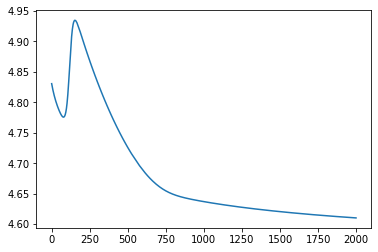

In [20]:
alpha=0.5 ##learning rate
iters=2000 ###iterations
batch_w,J_his = batch_gradient_descent(X0_train,Y0_train,w,alpha,iters)
plt.plot(range(iters),J_his)
plt.show()

In [21]:
z = np.dot(X0_test, batch_w.T)
print(z.T)
h = sigmoid(z)
y_pred=h>0.5
y_pred00=y_pred.astype(int)
print(y_pred00.T)


[ 0.60523046 -0.5827384  -0.38504174 -0.52363551  0.11115987 -0.1583156
 -0.18023385  0.46985019 -0.39795366 -0.72364849  0.34651454  0.28983602
 -0.58199863 -0.53017778  0.03943928  0.10207558  0.18278337 -0.12781948
 -0.08626594 -1.25009147  0.09304403 -0.05363652  0.09667808 -0.2172249
 -0.72520347 -0.16507315 -0.51128348 -0.32534283  0.45838243  0.22850177
  0.13580857  0.14029954 -0.10126846  0.10643189 -0.23310402  0.16338235
 -0.26825151 -0.34659639 -0.07200631  0.27168606 -0.12819707  0.76496063
 -0.22136403  0.14610172  0.10639124 -0.11427757  0.00475525 -0.61448891
 -0.81235964 -0.44261708  0.40132154  0.52087779  0.71344517  0.03849862
 -1.37906373  0.53657437  0.76496063 -0.24710184 -0.31748737  0.12441235
  0.56677261 -0.86227765  0.35270564  0.42651424  0.59057244  0.30519262
  0.76228519 -0.03026313 -0.58328503  0.4060624  -0.05630179  0.03816394
  0.52287418  0.41859    -0.25338566 -0.38396338  0.31895833  0.56308259
  0.8968476  -0.19213456 -0.17084441 -0.11058904 -0.2

In [22]:
#Implementing Grid Search for hyperparameter tuning

iters = 2000
def grid_search00(w,X,y):
  alpha_val = [0.01 , 0.05 , 0.1 , 0.15 , 0.2 , 0.5]
  lambda_val = [0.05 , 0.1 , 0.15 , 0.2 , 0.5 , 1]
  max_w = w
  max_accuracy = 0
  for alpha in alpha_val:
    for Lambda in lambda_val:
      w_temp , J_temp = batch_gradient_descent(X,y,w,alpha,iters)
      m = y.shape[0]
      hypothesis = sigmoid(np.dot(X0_val,w_temp.T))
      error = hypothesis - y
      accuracy = 100 - (np.mean(np.abs(hypothesis - y))*100)
      if max_accuracy < accuracy:
        max_accuracy = accuracy
        max_w = w_temp
  return max_w , max_accuracy


In [23]:
final_w , final_accuracy00 = grid_search00(w,X0_val,Y0_val)
#print(final_w)
print(final_accuracy00)

61.989218713660236


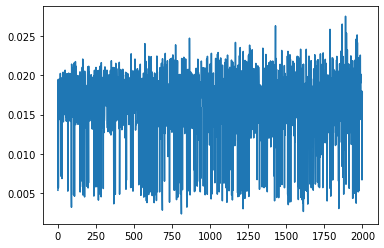

In [25]:
alpha=0.2
iters=2000
batch_size=5
mini_batch_w,J_mini_batch = MB_gradient_descent(X0_train,Y0_train,w,alpha,iters, batch_size)
plt.plot(range(iters),J_mini_batch)
plt.show()


In [26]:
z = np.dot(X0_test, mini_batch_w.T)
print(z.T)
h = sigmoid(z)
y_pred=h>0.5
y_pred01=y_pred.astype(int)
print(y_pred01.T)


[ 1.53644579e+00  8.95378529e-02  2.07371280e-01  2.77422600e-01
  5.17506603e-01  1.71668975e-01  6.67157595e-02  9.41600697e-01
  1.59043896e-01 -3.58755591e-01  9.22226279e-01  7.81523861e-01
  3.01032130e-02  1.01516062e-01  6.28087004e-01  3.34588315e-01
  7.19557322e-01  3.31226654e-01  3.68267658e-01 -6.32769839e-01
  5.24284917e-01  4.81222806e-01  4.22395298e-01  7.56419317e-01
 -8.91244611e-02  4.94084127e-01 -2.15532988e-02  1.14726737e-01
  1.00971815e+00  6.38748141e-01  5.19674587e-01  5.86694938e-01
  1.47565973e-01  6.61192831e-01  1.71617498e-01  5.85680650e-01
  2.07912525e-01  1.58308022e-01  6.32576320e-01  3.03671715e-01
  2.41687653e-01  1.32021203e+00  4.11631405e-01  7.65284235e-01
  3.16245425e-01  3.76540439e-01  4.77123026e-01 -6.45482079e-02
 -1.39019125e-01  1.66587837e-01  9.82996741e-01  9.94890421e-01
  1.15771955e+00  2.74160111e-01 -9.22701741e-01  8.93902085e-01
  1.32021203e+00  3.05510308e-01  2.34046465e-01  6.00038851e-01
  7.45375195e-01 -5.15416

In [27]:
#Implementing Grid Search for hyperparameter tuning

iters = 2000
def grid_search01(w,X,y):
  alpha_val = [0.01 , 0.05 , 0.1 , 0.15 , 0.2 , 0.5]
  lambda_val = [0.05 , 0.1 , 0.15 , 0.2 , 0.5 , 1]
  max_w = w
  max_accuracy = 0
  for alpha in alpha_val:
    for Lambda in lambda_val:
      w_temp , J_temp = MB_gradient_descent(X,y,w,alpha,iters, batch_size)
      m = y.shape[0]
      hypothesis = sigmoid(np.dot(X0_val,w_temp.T))
      error = hypothesis - y
      accuracy = 100 - (np.mean(np.abs(hypothesis - y))*100)
      if max_accuracy < accuracy:
        max_accuracy = accuracy
        max_w = w_temp
  return max_w , max_accuracy

In [28]:
final_w , final_accuracy01 = grid_search01(w,X0_val,Y0_val)
#print(final_w)
print(final_accuracy01)

63.82771315006708


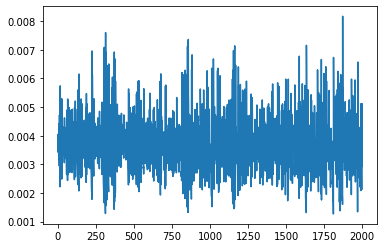

In [29]:
n_epochs=2000
alpha=0.02
w_n,J_sgd = stochastic_gradient_descent(X0_train,Y0_train,w, alpha, n_epochs)
plt.plot(range(n_epochs),J_sgd)
plt.show()


In [30]:
z = np.dot(X0_test, w_n.T)
print(z.T)
h = sigmoid(z)
y_pred=h>0.5
y_pred02=y_pred.astype(int)
print(y_pred02.T)


[ 9.10474258e-01  3.65961824e-01 -1.00351930e-01  9.11102365e-02
  3.71595114e-01  7.46017082e-02  2.71358533e-02  2.78830814e-01
  1.25662419e-01 -2.16734250e-01  2.91698517e-01  3.63857186e-01
  3.03789869e-01  3.85395594e-01  3.47633461e-01  2.15704992e-01
  7.79828325e-02  2.65014304e-01  2.52860743e-01 -1.52582620e-01
  9.37106304e-02  3.38068120e-01  2.85254259e-01  2.48847211e-01
  7.00037769e-02  4.30148004e-01  2.36904976e-02  3.63675290e-02
  4.22531075e-01  3.72299423e-01  4.31062949e-01  3.20824841e-01
 -1.17145375e-01  3.41845654e-01  2.75533073e-02  5.50375110e-01
  2.44188217e-01  2.40407282e-01  2.06695928e-01  2.26891494e-02
 -1.14171191e-04  5.49292481e-01  1.80532717e-01  1.94330220e-01
 -6.94189592e-03  4.88082809e-01  4.37261741e-01  2.32442821e-01
 -2.43081559e-02  1.16987143e-02  7.29334223e-01  3.09476409e-01
  3.74174029e-01 -2.06641900e-01 -3.79995558e-01  4.27879831e-01
  5.49292481e-01 -7.82508953e-02  1.52236132e-01  2.78085705e-01
  3.81707690e-01  3.36106

In [31]:
#Implementing Grid Search for hyperparameter tuning

iters = 2000
def grid_search02(w,X,y):
  alpha_val = [0.01 , 0.05 , 0.1 , 0.15 , 0.2 , 0.5]
  lambda_val = [0.05 , 0.1 , 0.15 , 0.2 , 0.5 , 1]
  max_w = w
  max_accuracy = 0
  for alpha in alpha_val:
    for Lambda in lambda_val:
      w_temp , J_temp = stochastic_gradient_descent(X,y,w, alpha, n_epochs)
      m = y.shape[0]
      hypothesis = sigmoid(np.dot(X0_val,w_temp.T))
      error = hypothesis - y
      accuracy = 100 - (np.mean(np.abs(hypothesis - y))*100)
      if max_accuracy < accuracy:
        max_accuracy = accuracy
        max_w = w_temp
  return max_w , max_accuracy

In [32]:
final_w , final_accuracy02 = grid_search02(w,X0_val,Y0_val)
#print(final_w)
print(final_accuracy02)

64.90045789477708


For 2nd class

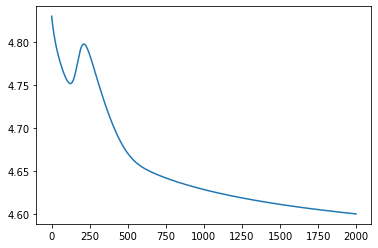

In [33]:
alpha=0.5 ##learning rate
iters=2000 ###iterations
batch_w,J_his = batch_gradient_descent(X1_train,Y1_train,w,alpha,iters)
plt.plot(range(iters),J_his)
plt.show()

In [34]:
z = np.dot(X1_test, batch_w.T)
print(z.T)
h = sigmoid(z)
y_pred=h>0.5
y_pred10=y_pred.astype(int)
print(y_pred10.T)


[ 0.20605428  0.2836073  -0.32759662  0.45973832 -1.03678688  0.01401123
 -0.46559736  0.18100968 -0.52005657 -0.0923928  -0.1578865   0.45844802
 -0.0231075  -0.27572919 -0.02320431  0.20429646  0.73773658 -0.59013995
  0.15930308 -0.83652801  0.22177429 -0.29772814 -0.52512051  0.54039364
 -0.50569967 -0.10149029 -0.15321353  0.54214764  0.71163504  0.40976053
 -0.67632075  0.60529675 -0.79116015  0.17916213  0.04356    -0.01595991
 -0.24822852  0.58740321  0.09904848  0.08368694 -0.15121684  0.17770536
 -1.48674064 -0.2938668  -0.45120682  0.47402248 -1.00505322 -0.45241443
 -0.37036267 -0.40978659  0.15876593  0.45271993  0.71321237  0.36770213
 -0.9378427  -0.24500129  0.17770536 -0.75236652 -0.69045376  0.32198659
  0.42480773 -0.80847192  0.02491534 -1.26547982 -0.55527827 -0.24794112
  0.4847859  -0.21339646 -2.13250043 -0.01747765 -1.04877571  0.14571269
  0.19003591  0.19947823  0.08325302  0.76191582 -0.09993405 -0.23357022
 -0.12441611  0.07623105 -0.05353142 -0.02011198  0

In [35]:
#Implementing Grid Search for hyperparameter tuning

iters = 2000
def grid_search10(w,X,y):
  alpha_val = [0.01 , 0.05 , 0.1 , 0.15 , 0.2 , 0.5]
  lambda_val = [0.05 , 0.1 , 0.15 , 0.2 , 0.5 , 1]
  max_w = w
  max_accuracy = 0
  for alpha in alpha_val:
    for Lambda in lambda_val:
      w_temp , J_temp = batch_gradient_descent(X,y,w,alpha,iters)
      m = y.shape[0]
      hypothesis = sigmoid(np.dot(X0_val,w_temp.T))
      error = hypothesis - y
      accuracy = 100 - (np.mean(np.abs(hypothesis - y))*100)
      if max_accuracy < accuracy:
        max_accuracy = accuracy
        max_w = w_temp
  return max_w , max_accuracy


In [36]:
final_w , final_accuracy10 = grid_search10(w,X1_val,Y1_val)
#print(final_w)
print(final_accuracy10)

55.70365881841955


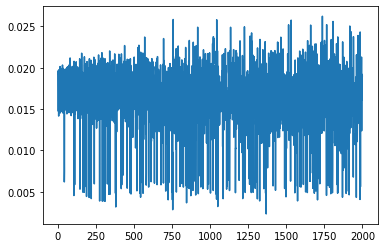

In [38]:
alpha=0.2
iters=2000
batch_size=5
mini_batch_w,J_mini_batch = MB_gradient_descent(X1_train,Y1_train,w,alpha,iters, batch_size)
plt.plot(range(iters),J_mini_batch)
plt.show()


In [39]:
z = np.dot(X1_test, mini_batch_w.T)
print(z.T)
h = sigmoid(z)
y_pred=h>0.5
y_pred11=y_pred.astype(int)
print(y_pred11.T)


[-0.00341446  0.10199999 -0.37491336  0.4148656  -0.87599057  0.30989729
  0.00419517  0.46096132 -0.03825048  0.60807693 -0.24953945  0.50520808
 -0.0511969  -0.06736482  0.37633327  0.38827342  0.67842902 -0.29973482
  0.67761947 -0.60458833  0.42383606 -0.13166206 -0.03381025  0.74808694
 -0.25152908  0.05378927  0.02533835  1.11325404  0.4963162   0.61494391
 -0.88285138  0.60722188 -0.23018152  0.23649877  0.04464256  0.01373638
  0.27167539  1.09459637  0.10660106  0.34876275  0.38664255  0.1662739
 -1.28940262 -0.32876214  0.25959598  0.81156827 -0.88122391 -0.10061509
 -0.35853298 -0.40271262  0.28053267  0.42833198  0.68486258  0.31614691
 -0.33165312 -0.12045549  0.1662739  -0.5908284  -0.4884599   0.37813203
  0.53106391 -0.28953421 -0.20286293 -0.78962051 -0.46850415  0.43220578
  0.34784188 -0.03305444 -0.99173632  0.04411064 -0.37013107  0.2354581
  0.61356305  0.52606904  0.23099185  0.72918468 -0.0543225  -0.05815127
  0.03324395  0.63435848  0.16755063  0.05401948  1.0

In [40]:
#Implementing Grid Search for hyperparameter tuning

iters = 2000
def grid_search11(w,X,y):
  alpha_val = [0.01 , 0.05 , 0.1 , 0.15 , 0.2 , 0.5]
  lambda_val = [0.05 , 0.1 , 0.15 , 0.2 , 0.5 , 1]
  max_w = w
  max_accuracy = 0
  for alpha in alpha_val:
    for Lambda in lambda_val:
      w_temp , J_temp = MB_gradient_descent(X,y,w,alpha,iters, batch_size)
      m = y.shape[0]
      hypothesis = sigmoid(np.dot(X0_val,w_temp.T))
      error = hypothesis - y
      accuracy = 100 - (np.mean(np.abs(hypothesis - y))*100)
      if max_accuracy < accuracy:
        max_accuracy = accuracy
        max_w = w_temp
  return max_w , max_accuracy

In [41]:
final_w , final_accuracy11 = grid_search02(w,X1_val,Y1_val)
#print(final_w)
print(final_accuracy11)

59.56363065879727


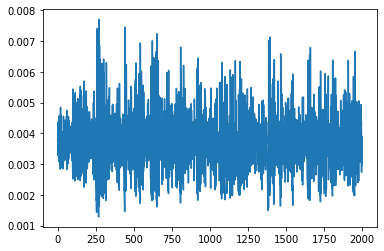

In [42]:
n_epochs=2000
alpha=0.02
w_n,J_sgd = stochastic_gradient_descent(X1_train,Y1_train,w, alpha, n_epochs)
plt.plot(range(n_epochs),J_sgd)
plt.show()


In [43]:
z = np.dot(X1_test, w_n.T)
print(z.T)
h = sigmoid(z)
y_pred=h>0.5
y_pred12=y_pred.astype(int)
print(y_pred12.T)


[-0.06071628  0.29039843 -0.13345838 -0.10813892 -0.27683103 -0.01378348
 -0.25671363 -0.20259672  0.09520474 -0.04302216 -0.38663208  0.01692447
 -0.11439305  0.01846571  0.14671267  0.03901501 -0.12543841 -0.25174054
 -0.29685716 -0.26624767 -0.2286897  -0.22222116 -0.25140379  0.08095896
 -0.32927848 -0.19597215 -0.07227167  0.08799184 -0.01131129  0.15354863
 -0.22061969 -0.05593865 -0.2796826  -0.19005761  0.16817831 -0.15155631
 -0.09948279 -0.14136849 -0.10660033 -0.03935717 -0.18612944 -0.05824675
 -0.07244342 -0.23237784 -0.32024206  0.29560463 -0.09157634 -0.13686411
 -0.3391946  -0.2600913   0.19557602 -0.16753924  0.28691291 -0.15363184
 -0.59508613 -0.07258996 -0.05824675 -0.21819797 -0.23146133 -0.33229906
  0.1412445  -0.40741095 -0.25857873 -0.41397246 -0.43041111 -0.25829611
 -0.27660162 -0.28718789 -0.58971756  0.17828616 -0.59627746  0.03570052
 -0.15214883  0.00066666 -0.07707919 -0.07002081  0.09711351 -0.30719093
 -0.16011176 -0.03110892 -0.1081599  -0.17189064 -0

In [44]:
#Implementing Grid Search for hyperparameter tuning

iters = 2000
def grid_search12(w,X,y):
  alpha_val = [0.01 , 0.05 , 0.1 , 0.15 , 0.2 , 0.5]
  lambda_val = [0.05 , 0.1 , 0.15 , 0.2 , 0.5 , 1]
  max_w = w
  max_accuracy = 0
  for alpha in alpha_val:
    for Lambda in lambda_val:
      w_temp , J_temp = stochastic_gradient_descent(X, y,w, alpha, n_epochs)
      m = y.shape[0]
      hypothesis = sigmoid(np.dot(X0_val,w_temp.T))
      error = hypothesis - y
      accuracy = 100 - (np.mean(np.abs(hypothesis - y))*100)
      if max_accuracy < accuracy:
        max_accuracy = accuracy
        max_w = w_temp
  return max_w , max_accuracy

In [45]:
final_w , final_accuracy12 = grid_search12(w,X1_val,Y1_val)
#print(final_w)
print(final_accuracy12)

58.33094566808987


For 3rd class

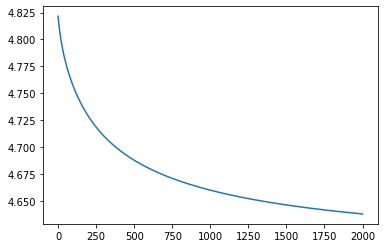

In [46]:
alpha=0.5 ##learning rate
iters=2000 ###iterations
batch_w,J_his = batch_gradient_descent(X2_train,Y2_train,w,alpha,iters)
plt.plot(range(iters),J_his)
plt.show()

In [47]:
z = np.dot(X2_test, batch_w.T)
print(z.T)
h = sigmoid(z)
y_pred=h>0.5
y_pred20=y_pred.astype(int)
print(y_pred20.T)


[-5.32391257e-01  2.33443957e-03 -9.11626362e-01 -1.38024123e-01
  7.43729446e-02  3.02335534e-01 -2.18488761e-01  1.01810241e-01
 -6.56107577e-01 -6.79993752e-01  3.81774527e-01  3.26265636e-01
 -3.92279137e-01 -3.79312186e-01 -2.90323502e-01 -5.30598652e-01
  2.41858462e-01 -1.14646759e-01  1.92461674e-01 -3.85026179e-01
 -2.15243314e-01 -1.90488584e-01  2.25841755e-01 -2.88832921e-01
 -7.55192462e-01  2.03101381e-01  4.24495016e-02 -1.29136296e-01
 -1.18736667e-01 -1.31001720e-01  2.25578570e-01 -2.09743425e-01
 -3.13300077e-01 -1.76340402e-01 -4.29337894e-01 -5.28819912e-01
 -4.90006054e-01 -7.65738153e-01  5.76997490e-01 -5.25667738e-01
  1.90446270e-01  3.30940849e-01 -9.38107727e-01 -1.83616727e-01
  6.77579260e-01  2.23453987e-01 -3.64993582e-01  5.44267569e-01
  1.85742049e-01 -8.53077322e-01  1.98733907e-01  2.38280535e-01
  2.02056981e-01 -4.90935000e-01 -4.19845710e-01 -7.72821189e-02
 -8.86398795e-01  2.97325980e-02 -2.26187325e-01  6.96239947e-02
 -2.94532510e-01 -1.79688

In [48]:
#Implementing Grid Search for hyperparameter tuning

iters = 2000
def grid_search20(w,X,y):
  alpha_val = [0.01 , 0.05 , 0.1 , 0.15 , 0.2 , 0.5]
  lambda_val = [0.05 , 0.1 , 0.15 , 0.2 , 0.5 , 1]
  max_w = w
  max_accuracy = 0
  for alpha in alpha_val:
    for Lambda in lambda_val:
      w_temp , J_temp = batch_gradient_descent(X,y,w,alpha,iters)
      m = y.shape[0]
      hypothesis = sigmoid(np.dot(X0_val,w_temp.T))
      error = hypothesis - y
      accuracy = 100 - (np.mean(np.abs(hypothesis - y))*100)
      if max_accuracy < accuracy:
        max_accuracy = accuracy
        max_w = w_temp
  return max_w , max_accuracy


In [ ]:
final_w , final_accuracy20 = grid_search20(w,X2_val,Y2_val)
#print(final_w)
print(final_accuracy20)

In [ ]:
alpha=0.2
iters=2000
batch_size=5
mini_batch_w,J_mini_batch = MB_gradient_descent(X2_train,Y2_train,w,alpha,iters, batch_size)
plt.plot(range(iters),J_mini_batch)
plt.show()


In [ ]:
z = np.dot(X2_test, mini_batch_w.T)
print(z.T)
h = sigmoid(z)
y_pred=h>0.5
y_pred21=y_pred.astype(int)
print(y_pred21.T)


In [ ]:
#Implementing Grid Search for hyperparameter tuning

iters = 2000
def grid_search21(w,X,y):
  alpha_val = [0.01 , 0.05 , 0.1 , 0.15 , 0.2 , 0.5]
  lambda_val = [0.05 , 0.1 , 0.15 , 0.2 , 0.5 , 1]
  max_w = w
  max_accuracy = 0
  for alpha in alpha_val:
    for Lambda in lambda_val:
      w_temp , J_temp = MB_gradient_descent(X,y,w,alpha,iters, batch_size)
      m = y.shape[0]
      hypothesis = sigmoid(np.dot(X0_val,w_temp.T))
      error = hypothesis - y
      accuracy = 100 - (np.mean(np.abs(hypothesis - y))*100)
      if max_accuracy < accuracy:
        max_accuracy = accuracy
        max_w = w_temp
  return max_w , max_accuracy

In [ ]:
final_w , final_accuracy21 = grid_search21(w,X2_val,Y2_val)
#print(final_w)
print(final_accuracy21)

In [ ]:
n_epochs=2000
alpha=0.02
w_n,J_sgd = stochastic_gradient_descent(X2_train,Y2_train,w, alpha, n_epochs)
plt.plot(range(n_epochs),J_sgd)
plt.show()


In [ ]:
z = np.dot(X2_test, w_n.T)
print(z.T)
h = sigmoid(z)
y_pred=h>0.5
y_pred22=y_pred.astype(int)
print(y_pred22.T)


In [ ]:
#Implementing Grid Search for hyperparameter tuning

iters = 2000
def grid_search22(w,X,y):
  alpha_val = [0.01 , 0.05 , 0.1 , 0.15 , 0.2 , 0.5]
  lambda_val = [0.05 , 0.1 , 0.15 , 0.2 , 0.5 , 1]
  max_w = w
  max_accuracy = 0
  for alpha in alpha_val:
    for Lambda in lambda_val:
      w_temp , J_temp = stochastic_gradient_descent(X0_train,Y0_train,w, alpha, n_epochs)
      m = y.shape[0]
      hypothesis = sigmoid(np.dot(X0_val,w_temp.T))
      error = hypothesis - y
      accuracy = 100 - (np.mean(np.abs(hypothesis - y))*100)
      if max_accuracy < accuracy:
        max_accuracy = accuracy
        max_w = w_temp
  return max_w , max_accuracy

In [ ]:
final_w , final_accuracy22 = grid_search22(w,X2_val,Y2_val)
#print(final_w)
print(final_accuracy22)

4th class

In [ ]:
alpha=0.5 ##learning rate
iters=2000 ###iterations
batch_w,J_his = batch_gradient_descent(X3_train,Y3_train,w,alpha,iters)
plt.plot(range(iters),J_his)
plt.show()

In [ ]:
z = np.dot(X3_test, batch_w.T)
print(z.T)
h = sigmoid(z)
y_pred=h>0.5
y_pred30=y_pred.astype(int)
print(y_pred30.T)


In [ ]:
#Implementing Grid Search for hyperparameter tuning

iters = 2000
def grid_search30(w,X,y):
  alpha_val = [0.01 , 0.05 , 0.1 , 0.15 , 0.2 , 0.5]
  lambda_val = [0.05 , 0.1 , 0.15 , 0.2 , 0.5 , 1]
  max_w = w
  max_accuracy = 0
  for alpha in alpha_val:
    for Lambda in lambda_val:
      w_temp , J_temp = batch_gradient_descent(X,y,w,alpha,iters)
      m = y.shape[0]
      hypothesis = sigmoid(np.dot(X0_val,w_temp.T))
      error = hypothesis - y
      accuracy = 100 - (np.mean(np.abs(hypothesis - y))*100)
      if max_accuracy < accuracy:
        max_accuracy = accuracy
        max_w = w_temp
  return max_w , max_accuracy


In [ ]:
final_w , final_accuracy30 = grid_search30(w,X3_val,Y3_val)
#print(final_w)
print(final_accuracy30)

In [ ]:
alpha=0.2
iters=2000
batch_size=5
mini_batch_w,J_mini_batch = MB_gradient_descent(X3_train,Y3_train,w,alpha,iters, batch_size)
plt.plot(range(iters),J_mini_batch)
plt.show()


In [ ]:
z = np.dot(X3_test, mini_batch_w.T)
print(z.T)
h = sigmoid(z)
y_pred=h>0.5
y_pred31=y_pred.astype(int)
print(y_pred31.T)


In [ ]:
#Implementing Grid Search for hyperparameter tuning

iters = 2000
def grid_search31(w,X,y):
  alpha_val = [0.01 , 0.05 , 0.1 , 0.15 , 0.2 , 0.5]
  lambda_val = [0.05 , 0.1 , 0.15 , 0.2 , 0.5 , 1]
  max_w = w
  max_accuracy = 0
  for alpha in alpha_val:
    for Lambda in lambda_val:
      w_temp , J_temp = MB_gradient_descent(X,y,w,alpha,iters, batch_size)
      m = y.shape[0]
      hypothesis = sigmoid(np.dot(X0_val,w_temp.T))
      error = hypothesis - y
      accuracy = 100 - (np.mean(np.abs(hypothesis - y))*100)
      if max_accuracy < accuracy:
        max_accuracy = accuracy
        max_w = w_temp
  return max_w , max_accuracy

In [ ]:
final_w , final_accuracy31 = grid_search31(w,X3_val,Y3_val)
#print(final_w)
print(final_accuracy31)

In [ ]:
n_epochs=2000
alpha=0.02
w_n,J_sgd = stochastic_gradient_descent(X3_train,Y3_train,w, alpha, n_epochs)
plt.plot(range(n_epochs),J_sgd)
plt.show()


In [ ]:
z = np.dot(X3_test, w_n.T)
print(z.T)
h = sigmoid(z)
y_pred=h>0.5
y_pred32=y_pred.astype(int)
print(y_pred32.T)


In [ ]:
#Implementing Grid Search for hyperparameter tuning

iters = 2000
def grid_search32(w,X,y):
  alpha_val = [0.01 , 0.05 , 0.1 , 0.15 , 0.2 , 0.5]
  lambda_val = [0.05 , 0.1 , 0.15 , 0.2 , 0.5 , 1]
  max_w = w
  max_accuracy = 0
  for alpha in alpha_val:
    for Lambda in lambda_val:
      w_temp , J_temp = stochastic_gradient_descent(X0_train,Y0_train,w, alpha, n_epochs)
      m = y.shape[0]
      hypothesis = sigmoid(np.dot(X0_val,w_temp.T))
      error = hypothesis - y
      accuracy = 100 - (np.mean(np.abs(hypothesis - y))*100)
      if max_accuracy < accuracy:
        max_accuracy = accuracy
        max_w = w_temp
  return max_w , max_accuracy

In [ ]:
final_w , final_accuracy32 = grid_search32(w,X3_val,Y3_val)
#print(final_w)
print(final_accuracy32)

For 5th class

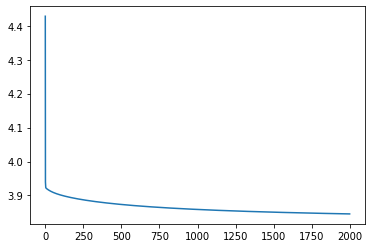

In [ ]:
alpha=0.5 ##learning rate
iters=2000 ###iterations
batch_w,J_his = batch_gradient_descent(X4_train,Y4_train,w,alpha,iters)
plt.plot(range(iters),J_his)
plt.show()

In [ ]:
z = np.dot(X4_test, batch_w.T)
print(z.T)
h = sigmoid(z)
y_pred=h>0.5
y_pred30=y_pred.astype(int)
print(y_pred30.T)


[-0.97105319 -0.56674545 -1.22028454 -0.79904274 -0.91280132 -1.29408098
 -0.44498686 -1.13016261 -1.32379163 -0.92314524 -1.27572459 -1.00306506
 -1.65221096 -0.95741856 -1.05704929 -1.08581719 -0.92054227 -0.58948741
 -1.12496444 -1.09929922 -0.94388326 -0.71246285 -1.34717504 -0.69874081
 -1.47162796 -1.85518081 -1.12535151 -1.34090593 -1.11075075 -1.50352519
 -1.16279096 -1.36988967 -1.01442035 -1.36163184 -1.2820262  -1.07649146
 -0.93835108 -1.00232418 -0.9981199  -1.28564738 -1.19027284 -1.13707238
 -1.41574517 -1.62313856 -0.9074018  -0.95508583 -1.19932987 -1.31796713
 -1.34320609 -1.61277665 -1.47925803 -0.88763036 -1.38559746 -1.125286
 -1.59574299 -1.46490629 -1.33012676 -0.88288548 -1.69397419 -1.4088091
 -1.4577492  -1.04144962 -1.05421568 -1.13410368 -1.37128268 -0.90138876
 -0.74808224 -1.16223015 -1.2547576  -1.49089225 -1.52003692 -1.4570548
 -1.39994487 -1.02435633 -0.47375398 -1.15496155 -1.23420213 -0.67421903
 -1.59151658 -0.9135219  -1.05609458 -0.8991721  -1.095

In [ ]:
#Implementing Grid Search for hyperparameter tuning

iters = 2000
def grid_search40(w,X,y):
  alpha_val = [0.01 , 0.05 , 0.1 , 0.15 , 0.2 , 0.5]
  lambda_val = [0.05 , 0.1 , 0.15 , 0.2 , 0.5 , 1]
  max_w = w
  max_accuracy = 0
  for alpha in alpha_val:
    for Lambda in lambda_val:
      w_temp , J_temp = batch_gradient_descent(X,y,w,alpha,iters)
      m = y.shape[0]
      hypothesis = sigmoid(np.dot(X0_val,w_temp.T))
      error = hypothesis - y
      accuracy = 100 - (np.mean(np.abs(hypothesis - y))*100)
      if max_accuracy < accuracy:
        max_accuracy = accuracy
        max_w = w_temp
  return max_w , max_accuracy


In [ ]:
final_w , final_accuracy40 = grid_search40(w,X4_val,Y4_val)
#print(final_w)
print(final_accuracy40)

67.56499157287459


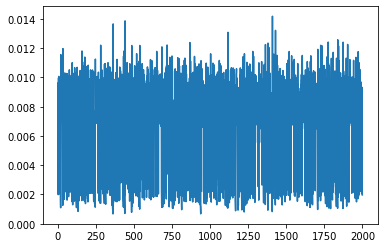

In [ ]:
alpha=0.2
iters=2000
batch_size=5
mini_batch_w,J_mini_batch = MB_gradient_descent(X4_train,Y4_train,w,alpha,iters, batch_size)
plt.plot(range(iters),J_mini_batch)
plt.show()


In [ ]:
z = np.dot(X4_test, mini_batch_w.T)
print(z.T)
h = sigmoid(z)
y_pred=h>0.5
y_pred41=y_pred.astype(int)
print(y_pred41.T)


[-1.99932397 -1.5040168  -2.15253967 -1.85508533 -1.75227805 -2.06351191
 -1.5084954  -1.95493545 -2.0257586  -1.84582477 -2.43802375 -2.02040037
 -2.48119549 -1.86673725 -2.02014583 -1.95300689 -1.99892882 -1.52459728
 -2.24337551 -2.03924568 -1.83230652 -1.90421034 -1.88421209 -1.65195821
 -2.38881459 -2.28842982 -1.66171736 -2.13519275 -1.80742571 -2.41096802
 -2.11086859 -2.18717972 -1.92909712 -2.24533879 -2.2076027  -2.11141655
 -1.63370077 -2.10531368 -1.85396683 -1.98753753 -2.16524974 -1.87951003
 -2.07285443 -2.42897979 -1.69930201 -1.73013972 -1.8374958  -2.13027833
 -2.20911296 -2.45682316 -2.44297326 -1.79304728 -2.30861453 -1.89637572
 -2.52237543 -2.22713015 -2.39425356 -1.82516496 -2.2977119  -2.3412702
 -2.27764529 -1.73003691 -1.80491506 -2.11419009 -1.94450842 -1.83514108
 -1.66870798 -1.95933876 -1.73790299 -2.31179224 -1.98858264 -2.38740359
 -2.15728396 -2.00571549 -1.64227687 -2.1231119  -2.12630585 -1.77915718
 -2.20930472 -1.96788631 -1.86995504 -1.62983673 -1.

In [ ]:
#Implementing Grid Search for hyperparameter tuning

iters = 2000
def grid_search31(w,X,y):
  alpha_val = [0.01 , 0.05 , 0.1 , 0.15 , 0.2 , 0.5]
  lambda_val = [0.05 , 0.1 , 0.15 , 0.2 , 0.5 , 1]
  max_w = w
  max_accuracy = 0
  for alpha in alpha_val:
    for Lambda in lambda_val:
      w_temp , J_temp = MB_gradient_descent(X,y,w,alpha,iters, batch_size)
      m = y.shape[0]
      hypothesis = sigmoid(np.dot(X0_val,w_temp.T))
      error = hypothesis - y
      accuracy = 100 - (np.mean(np.abs(hypothesis - y))*100)
      if max_accuracy < accuracy:
        max_accuracy = accuracy
        max_w = w_temp
  return max_w , max_accuracy

In [ ]:
final_w , final_accuracy41 = grid_search31(w,X4_val,Y4_val)
#print(final_w)
print(final_accuracy41)

76.08902258621174


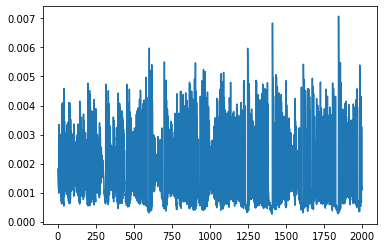

In [ ]:
n_epochs=2000
alpha=0.02
w_n,J_sgd = stochastic_gradient_descent(X4_train,Y4_train,w, alpha, n_epochs)
plt.plot(range(n_epochs),J_sgd)
plt.show()


In [ ]:
z = np.dot(X3_test, w_n.T)
print(z.T)
h = sigmoid(z)
y_pred=h>0.5
y_pred32=y_pred.astype(int)
print(y_pred32.T)


[-1.03501988 -0.59432522 -1.16585484 -1.05578706 -0.8202109  -1.1080791
 -0.66225671 -0.95152435 -0.8076464  -0.82259861 -1.17331359 -0.91835808
 -1.09913504 -0.95543542 -0.87509259 -0.85889337 -0.97014711 -0.80342551
 -1.18069089 -0.95308444 -0.98905065 -0.7573183  -0.84132272 -0.90853523
 -0.92437626 -1.16421523 -0.55829489 -0.98023309 -0.90695773 -0.99539635
 -0.98969422 -1.14837123 -0.79100072 -1.03192895 -0.96212502 -1.13435525
 -0.78605534 -0.77588693 -0.98825522 -0.9522373  -0.97934325 -0.93234204
 -1.02348985 -1.07630896 -0.93339626 -0.96467072 -0.93788843 -0.96719024
 -1.13699944 -1.27754864 -1.2507157  -0.94806574 -1.04577736 -0.9596432
 -1.18571796 -1.01238983 -1.27329214 -0.8608226  -0.99628881 -1.10035753
 -1.18813333 -0.8085621  -0.84153192 -0.91869385 -0.78820478 -0.84969776
 -0.80261938 -0.938617   -0.87319612 -1.08367914 -0.92737704 -1.00875674
 -1.18388718 -0.94460767 -0.79493406 -1.10411076 -0.94935726 -1.04108968
 -1.0941996  -0.98970989 -0.84986468 -0.81265806 -1.0

In [ ]:
#Implementing Grid Search for hyperparameter tuning

iters = 2000
def grid_search32(w,X,y):
  alpha_val = [0.01 , 0.05 , 0.1 , 0.15 , 0.2 , 0.5]
  lambda_val = [0.05 , 0.1 , 0.15 , 0.2 , 0.5 , 1]
  max_w = w
  max_accuracy = 0
  for alpha in alpha_val:
    for Lambda in lambda_val:
      w_temp , J_temp = stochastic_gradient_descent(X0_train,Y0_train,w, alpha, n_epochs)
      m = y.shape[0]
      hypothesis = sigmoid(np.dot(X0_val,w_temp.T))
      error = hypothesis - y
      accuracy = 100 - (np.mean(np.abs(hypothesis - y))*100)
      if max_accuracy < accuracy:
        max_accuracy = accuracy
        max_w = w_temp
  return max_w , max_accuracy

In [ ]:
final_w , final_accuracy42 = grid_search32(w,X3_val,Y3_val)
#print(final_w)
print(final_accuracy42)

76.24406603216175


For 6th class


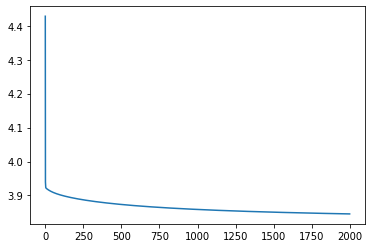

In [ ]:
alpha=0.5 ##learning rate
iters=2000 ###iterations
batch_w,J_his = batch_gradient_descent(X4_train,Y4_train,w,alpha,iters)
plt.plot(range(iters),J_his)
plt.show()

In [ ]:
z = np.dot(X3_test, batch_w.T)
print(z.T)
h = sigmoid(z)
y_pred=h>0.5
y_pred30=y_pred.astype(int)
print(y_pred30.T)


[-0.97105319 -0.56674545 -1.22028454 -0.79904274 -0.91280132 -1.29408098
 -0.44498686 -1.13016261 -1.32379163 -0.92314524 -1.27572459 -1.00306506
 -1.65221096 -0.95741856 -1.05704929 -1.08581719 -0.92054227 -0.58948741
 -1.12496444 -1.09929922 -0.94388326 -0.71246285 -1.34717504 -0.69874081
 -1.47162796 -1.85518081 -1.12535151 -1.34090593 -1.11075075 -1.50352519
 -1.16279096 -1.36988967 -1.01442035 -1.36163184 -1.2820262  -1.07649146
 -0.93835108 -1.00232418 -0.9981199  -1.28564738 -1.19027284 -1.13707238
 -1.41574517 -1.62313856 -0.9074018  -0.95508583 -1.19932987 -1.31796713
 -1.34320609 -1.61277665 -1.47925803 -0.88763036 -1.38559746 -1.125286
 -1.59574299 -1.46490629 -1.33012676 -0.88288548 -1.69397419 -1.4088091
 -1.4577492  -1.04144962 -1.05421568 -1.13410368 -1.37128268 -0.90138876
 -0.74808224 -1.16223015 -1.2547576  -1.49089225 -1.52003692 -1.4570548
 -1.39994487 -1.02435633 -0.47375398 -1.15496155 -1.23420213 -0.67421903
 -1.59151658 -0.9135219  -1.05609458 -0.8991721  -1.095

In [ ]:
#Implementing Grid Search for hyperparameter tuning

iters = 2000
def grid_search30(w,X,y):
  alpha_val = [0.01 , 0.05 , 0.1 , 0.15 , 0.2 , 0.5]
  lambda_val = [0.05 , 0.1 , 0.15 , 0.2 , 0.5 , 1]
  max_w = w
  max_accuracy = 0
  for alpha in alpha_val:
    for Lambda in lambda_val:
      w_temp , J_temp = batch_gradient_descent(X,y,w,alpha,iters)
      m = y.shape[0]
      hypothesis = sigmoid(np.dot(X0_val,w_temp.T))
      error = hypothesis - y
      accuracy = 100 - (np.mean(np.abs(hypothesis - y))*100)
      if max_accuracy < accuracy:
        max_accuracy = accuracy
        max_w = w_temp
  return max_w , max_accuracy


In [ ]:
final_w , final_accuracy50 = grid_search30(w,X4_val,Y4_val)
#print(final_w)
print(final_accuracy50)

67.56499157287459


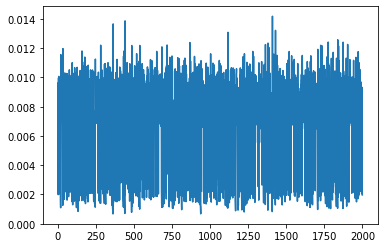

In [ ]:
alpha=0.2
iters=2000
batch_size=5
mini_batch_w,J_mini_batch = MB_gradient_descent(X4_train,Y4_train,w,alpha,iters, batch_size)
plt.plot(range(iters),J_mini_batch)
plt.show()


In [ ]:
z = np.dot(X3_test, mini_batch_w.T)
print(z.T)
h = sigmoid(z)
y_pred=h>0.5
y_pred31=y_pred.astype(int)
print(y_pred31.T)


[-1.99932397 -1.5040168  -2.15253967 -1.85508533 -1.75227805 -2.06351191
 -1.5084954  -1.95493545 -2.0257586  -1.84582477 -2.43802375 -2.02040037
 -2.48119549 -1.86673725 -2.02014583 -1.95300689 -1.99892882 -1.52459728
 -2.24337551 -2.03924568 -1.83230652 -1.90421034 -1.88421209 -1.65195821
 -2.38881459 -2.28842982 -1.66171736 -2.13519275 -1.80742571 -2.41096802
 -2.11086859 -2.18717972 -1.92909712 -2.24533879 -2.2076027  -2.11141655
 -1.63370077 -2.10531368 -1.85396683 -1.98753753 -2.16524974 -1.87951003
 -2.07285443 -2.42897979 -1.69930201 -1.73013972 -1.8374958  -2.13027833
 -2.20911296 -2.45682316 -2.44297326 -1.79304728 -2.30861453 -1.89637572
 -2.52237543 -2.22713015 -2.39425356 -1.82516496 -2.2977119  -2.3412702
 -2.27764529 -1.73003691 -1.80491506 -2.11419009 -1.94450842 -1.83514108
 -1.66870798 -1.95933876 -1.73790299 -2.31179224 -1.98858264 -2.38740359
 -2.15728396 -2.00571549 -1.64227687 -2.1231119  -2.12630585 -1.77915718
 -2.20930472 -1.96788631 -1.86995504 -1.62983673 -1.

In [ ]:
#Implementing Grid Search for hyperparameter tuning

iters = 2000
def grid_search31(w,X,y):
  alpha_val = [0.01 , 0.05 , 0.1 , 0.15 , 0.2 , 0.5]
  lambda_val = [0.05 , 0.1 , 0.15 , 0.2 , 0.5 , 1]
  max_w = w
  max_accuracy = 0
  for alpha in alpha_val:
    for Lambda in lambda_val:
      w_temp , J_temp = MB_gradient_descent(X,y,w,alpha,iters, batch_size)
      m = y.shape[0]
      hypothesis = sigmoid(np.dot(X0_val,w_temp.T))
      error = hypothesis - y
      accuracy = 100 - (np.mean(np.abs(hypothesis - y))*100)
      if max_accuracy < accuracy:
        max_accuracy = accuracy
        max_w = w_temp
  return max_w , max_accuracy

In [ ]:
final_w , final_accuracy51 = grid_search31(w,X3_val,Y3_val)
#print(final_w)
print(final_accuracy51)

76.08902258621174


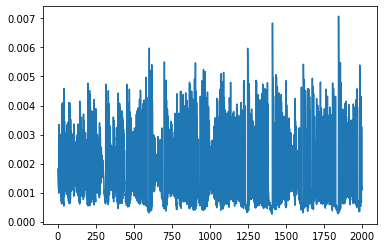

In [ ]:
n_epochs=2000
alpha=0.02
w_n,J_sgd = stochastic_gradient_descent(X4_train,Y4_train,w, alpha, n_epochs)
plt.plot(range(n_epochs),J_sgd)
plt.show()


In [ ]:
z = np.dot(X5_test, w_n.T)
print(z.T)
h = sigmoid(z)
y_pred=h>0.5
y_pred32=y_pred.astype(int)
print(y_pred32.T)


[-1.03501988 -0.59432522 -1.16585484 -1.05578706 -0.8202109  -1.1080791
 -0.66225671 -0.95152435 -0.8076464  -0.82259861 -1.17331359 -0.91835808
 -1.09913504 -0.95543542 -0.87509259 -0.85889337 -0.97014711 -0.80342551
 -1.18069089 -0.95308444 -0.98905065 -0.7573183  -0.84132272 -0.90853523
 -0.92437626 -1.16421523 -0.55829489 -0.98023309 -0.90695773 -0.99539635
 -0.98969422 -1.14837123 -0.79100072 -1.03192895 -0.96212502 -1.13435525
 -0.78605534 -0.77588693 -0.98825522 -0.9522373  -0.97934325 -0.93234204
 -1.02348985 -1.07630896 -0.93339626 -0.96467072 -0.93788843 -0.96719024
 -1.13699944 -1.27754864 -1.2507157  -0.94806574 -1.04577736 -0.9596432
 -1.18571796 -1.01238983 -1.27329214 -0.8608226  -0.99628881 -1.10035753
 -1.18813333 -0.8085621  -0.84153192 -0.91869385 -0.78820478 -0.84969776
 -0.80261938 -0.938617   -0.87319612 -1.08367914 -0.92737704 -1.00875674
 -1.18388718 -0.94460767 -0.79493406 -1.10411076 -0.94935726 -1.04108968
 -1.0941996  -0.98970989 -0.84986468 -0.81265806 -1.0

In [ ]:
#Implementing Grid Search for hyperparameter tuning

iters = 2000
def grid_search32(w,X,y):
  alpha_val = [0.01 , 0.05 , 0.1 , 0.15 , 0.2 , 0.5]
  lambda_val = [0.05 , 0.1 , 0.15 , 0.2 , 0.5 , 1]
  max_w = w
  max_accuracy = 0
  for alpha in alpha_val:
    for Lambda in lambda_val:
      w_temp , J_temp = stochastic_gradient_descent(X0_train,Y0_train,w, alpha, n_epochs)
      m = y.shape[0]
      hypothesis = sigmoid(np.dot(X0_val,w_temp.T))
      error = hypothesis - y
      accuracy = 100 - (np.mean(np.abs(hypothesis - y))*100)
      if max_accuracy < accuracy:
        max_accuracy = accuracy
        max_w = w_temp
  return max_w , max_accuracy

In [ ]:
final_w , final_accuracy52 = grid_search32(w,X5_val,Y5_val)
#print(final_w)
print(final_accuracy52)

76.24406603216175


For batch gradient descent


For batch gradient descent


In [ ]:
overall_acc = (final_accuracy00 + final_accuracy10 + final_accuracy20 + final_accuracy30 + final_accuracy40 + final_accuracy50)/6
print(overall_acc)

66.67237594943953


For MBGD


In [ ]:
overall_acc = (final_accuracy01 + final_accuracy11 + final_accuracy21 + final_accuracy31 + final_accuracy41 + final_accuracy51 )/4
print(overall_acc)

74.64413927853383


For SGD

In [ ]:
overall_acc = (final_accuracy02 + final_accuracy12 + final_accuracy22 + final_accuracy32 + final_accuracy42 + final_accuracy52)/4
print(overall_acc

75.13334829609516
